# << EDA >>

## 라이브러리 가져오기

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.colors as mcolors
from matplotlib import font_manager, rc

from scipy import stats
from scipy.stats import kruskal
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


In [ ]:
# 한글 폰트 문제 해결

# 방법1 : 폰트 경로 지정
font_path = 'C:\\Users\\NT551XCJ\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 방법2 : 그래프 그릴 때 아래 코드 작성
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

## 데이터 확인

In [ ]:
data_3 = pd.read_csv("전처리 최종 3.csv", encoding = "cp949")

In [ ]:
data.shape

(3752, 1066)

In [ ]:
data_3.head(5)

,Movie_name,Image_name,Movie_type,SpecIal,Month,Number_of_moviegoers,sales,Genre,Genre_comedy,Genre_drama,...,part_3,part_4,part_5,part_6,part_7,part_8,part_9,part_10,part_11,part_12
0,극한직업,극한직업.jpg,2D,0,1,16264944,140000000000,코미디,1,0,...,1,0,0,0,0,0,0,0,0,0
1,국제시장,국제시장.jpg,"필름,2D",0,12,14245998,111000000000,드라마,0,1,...,1,0,0,0,0,0,0,0,0,0
2,어벤져스: 엔드게임,어벤져스- 엔드게임.jpg,"2D,3D,4D,IMAX",3,4,13934592,122000000000,액션,0,0,...,1,1,1,1,0,0,0,0,0,0
3,베테랑,베테랑.jpg,"필름,2D",0,8,13395400,105000000000,액션,0,1,...,1,0,1,0,0,0,0,0,0,0
4,서울의 봄,서울의 봄.jpg,"2D,IMAX",1,11,13127637,128000000000,드라마,0,1,...,0,1,1,1,1,1,1,0,0,0


In [ ]:
# 컬럼 확인 #
for i, n in enumerate(data_3.columns):
    print(i, n)

0 Movie_name
1 Image_name
2 Movie_type
3 SpecIal
4 Month
5 Number_of_moviegoers
6 sales
7 Genre
8 Genre_comedy
9 Genre_drama
10 Genre_action
11 Genre_histroy
12 Genre_fantasy
13 Genre_animation
14 Genre_crime
15 Genre_adventure
16 Genre_mystery
17 Genre_SF
18 Genre_war
19 Genre_romance
20 Genre_thriller
21 Genre_documentary
22 Genre_horror
23 Genre_musical
24 Genre_family
25 Genre_concert
26 Genre_western
27 Genre_adult
28 Genre_n
29 Rating
30 Running_time
31 Color1
32 Color1_ratio
33 Color2
34 Color2_ratio
35 Color3
36 Color3_ratio
37 Color4
38 Color4_ratio
39 Color5
40 Color5_ratio
41 BoundingBox_Width_0
42 BoundingBox_Height_0
43 BoundingBox_Left_0
44 BoundingBox_Top_0
45 AgeRange_Low_0
46 AgeRange_High_0
47 Smile_Value_0
48 Smile_Confidence_0
49 Eyeglasses_Value_0
50 Eyeglasses_Confidence_0
51 Sunglasses_Value_0
52 Sunglasses_Confidence_0
53 Gender_Value_0
54 Gender_Confidence_0
55 Beard_Value_0
56 Beard_Confidence_0
57 Mustache_Value_0
58 Mustache_Confidence_0
59 EyesOpen_Value_0


## 파생 변수 생성

In [ ]:
# EDA이기 때문에 전체 데이터 사용

def label_moviegoers(num):
    if num >= 12000000000:
        return "1등급(120억 이상)"
    elif num >= 3000000000:
        return "2등급(30억 이상)"
    else:
        return "3등급(30억 미만)"

In [ ]:
data_3["grade_num"] = data_3["sales"].apply(label_moviegoers)

In [ ]:
# 그룹별 데이터 크기 확인

data_3.groupby("grade_num").size()

grade_num
1등급(120억 이상)     500
2등급(30억 이상)      509
3등급(30억 미만)     2743
dtype: int64

### 등급별 텍스트 비율 확인

In [ ]:
genre_title_rate = data_3[["grade_num","text_rate"]]
genre_title_rate

,grade_num,text_rate
0,1등급(120억 이상),0.521745
1,1등급(120억 이상),0.249670
2,1등급(120억 이상),0.106101
3,1등급(120억 이상),0.405040
4,1등급(120억 이상),0.255260
...,...,...
3747,3등급(30억 미만),0.150727
3748,3등급(30억 미만),0.388479
3749,3등급(30억 미만),0.219077
3750,3등급(30억 미만),0.174058


In [ ]:
g_r = genre_title_rate.groupby('grade_num')["text_rate"].mean().sort_values(ascending = True)
g_r

grade_num
1등급(120억 이상)    0.245465
2등급(30억 이상)     0.251114
3등급(30억 미만)     0.254741
Name: text_rate, dtype: float64

(0.22, 0.26)

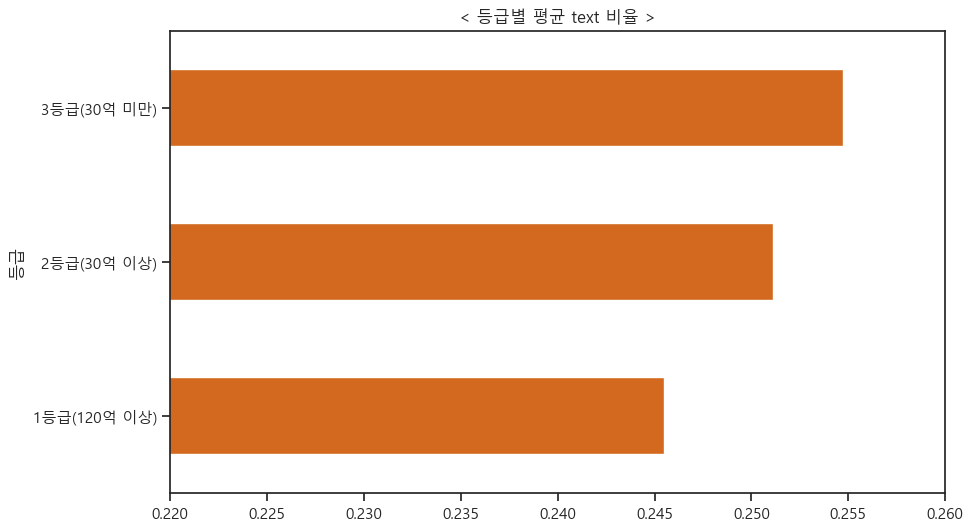

In [ ]:
plt.title('< 등급별 평균 text 비율 >')
g_r.plot(kind = "barh" ,color ="chocolate")
plt.ylabel('등급')
plt.xlim(0.22,0.26)

### part 개수 카운트

In [ ]:
def part(data, grade):
    matrix_sum = np.zeros((4, 3))
    parts = ['part_10', 'part_11', 'part_12','part_7', 'part_8', 'part_9','part_4', 'part_5', 'part_6','part_1', 'part_2', 'part_3']


    for idx, part in enumerate(parts):
        row = idx // 3 # 0,1,2,3
        col = idx % 3 # 0,1,2
        # print(row, col, idx, part)

        matrix_sum[row, col] = data[part].sum()

    plt.figure(figsize=(8, 6))
    # plt.imshow(matrix_sum, cmap='viridis', aspect='auto')
    plt.imshow(matrix_sum, cmap='viridis')

    plt.colorbar(label='합산 값')         # 색상 바 라벨
    plt.title(f'< title_{grade} 위치 >')  # 제목

    plt.xlabel('열')                 # x축 레이블
    plt.ylabel('행')                 # y축 레이블

    plt.xticks(np.arange(3), ['열1', '열2', '열3'])  # x축 눈금 레이블
    plt.yticks(np.arange(4), ['행4', '행3', '행2', '행1'])  # y축 눈금 레이블

  # plt.savefig(f"title_{genre}.jpg", format='jpg')

In [ ]:
part_sum = data_3.loc[data_3["grade_num"]=="1등급(120억 이상)","part_1": ]
# part_sum = data_3.loc[data_3["grade_num"]=="2등급(30억 이상)","part_1": ]
# part_sum = data_3.loc[data_3["grade_num"]=="3등급(30억 미만)","part_1": ]

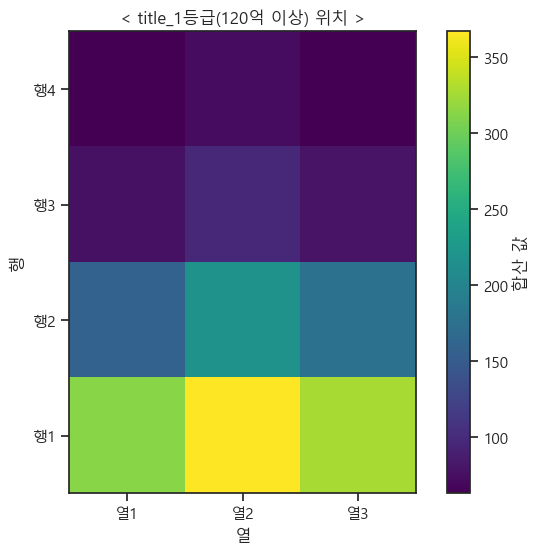

In [ ]:
part(part_sum,"1등급(120억 이상)")
# part(part_sum,"2등급(30억 이상)")
# part(part_sum,"3등급(30억 미만)")

In [ ]:
for i in range(1): # 인물 전체 확인하려고 했는데 1번 인물(main)만 확인함
    columns = ["Genre", "grade_num", f'Emotions_ANGRY_Confidence_{i}', f'Emotions_CALM_Confidence_{i}',
       f'Emotions_CONFUSED_Confidence_{i}', f'Emotions_SAD_Confidence_{i}',
       f'Emotions_DISGUSTED_Confidence_{i}', f'Emotions_SURPRISED_Confidence_{i}',
       f'Emotions_FEAR_Confidence_{i}', f'Emotions_HAPPY_Confidence_{i}']

    temp = data_3.loc[:, columns]
    temp[f"max_emotion_{i}"] = temp.iloc[:,2:].replace(999, pd.NA).idxmax(axis=1) #최고 값을 가진 index 값의 컬럼을 확인 999는 NaN 값
    temp[f"max_emotion_{i}"] =  temp[f"max_emotion_{i}"].apply(lambda x : x.split("_")[1] if type(x) != float else x) #감정만 남길 걸


emotion_counts = temp[temp["grade_num"]=="1등급(120억 이상)"].groupby('Genre')['max_emotion_0'].value_counts(normalize=True)
# emotion_counts = temp[temp["grade_num"]=="1등급(120억 이상)"].groupby('Genre')['max_emotion_0'].value_counts(normalize=True)
# emotion_counts = temp[temp["grade_num"]=="1등급(120억 이상)"].groupby('Genre')['max_emotion_0'].value_counts(normalize=True)

emotion_counts = emotion_counts.reset_index()
emotion_counts = emotion_counts.pivot(index = "Genre", columns="max_emotion_0", values ="proportion")
emotion_counts

C:\Users\NT551XCJ\AppData\Local\Temp\ipykernel_11380\4043612217.py:8: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  temp[f"max_emotion_{i}"] = temp.iloc[:,2:].replace(999, pd.NA).idxmax(axis=1) #최고 값을 가진 index 값의 컬럼을 확인 999는 NaN 값


max_emotion_0,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
Genre,,,,,,,,
SF,0.100000,0.500000,NaN,NaN,0.100000,NaN,0.200000,0.100000
가족,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
공포(호러),0.142857,0.285714,0.142857,NaN,0.285714,NaN,NaN,0.142857
다큐멘터리,NaN,NaN,0.333333,NaN,NaN,0.666667,NaN,NaN
드라마,0.126582,0.417722,0.050633,NaN,0.012658,0.316456,0.063291,0.012658
멜로/로맨스,NaN,0.400000,0.050000,NaN,NaN,0.500000,NaN,0.050000
뮤지컬,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,0.500000
미스터리,NaN,0.642857,0.071429,NaN,0.071429,NaN,0.214286,NaN
범죄,0.232558,0.488372,0.023256,NaN,0.046512,NaN,0.186047,0.023256


C:\Users\NT551XCJ\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(0.5, 1.0, '< 1등급(120억 이상) 메인 인물 감정 >')

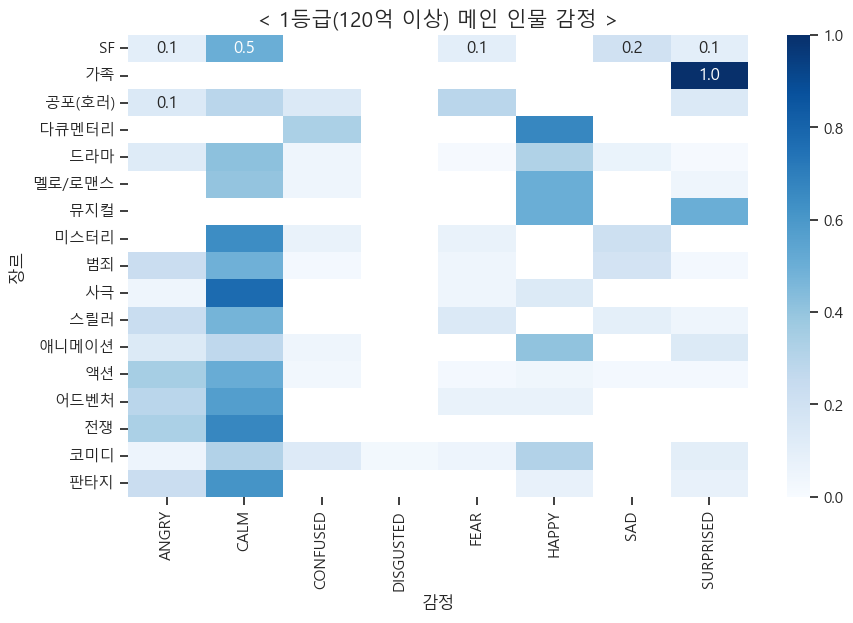

In [ ]:
sns.heatmap(emotion_counts, cmap='Blues', vmin = 0, vmax = 1, annot=True, fmt=".1f" )
plt.xlabel("감정")
plt.ylabel("장르")

plt.title("< 1등급(120억 이상) 메인 인물 감정 >", fontsize =15)
# plt.title("< 1등급(30억 이상) 메인 인물 감정 >", fontsize =15)
# plt.title("< 1등급(30억 미만) 메인 인물 감정 >", fontsize =15)

### 월별 영화 개봉 수

In [ ]:
temp = pd.Series(data["Month"]).value_counts().sort_index() # 웗 순서대로 정리
temp = pd.DataFrame(temp).reset_index()

Text(0.5, 1.0, '< 월별 영화 개봉 수 >')

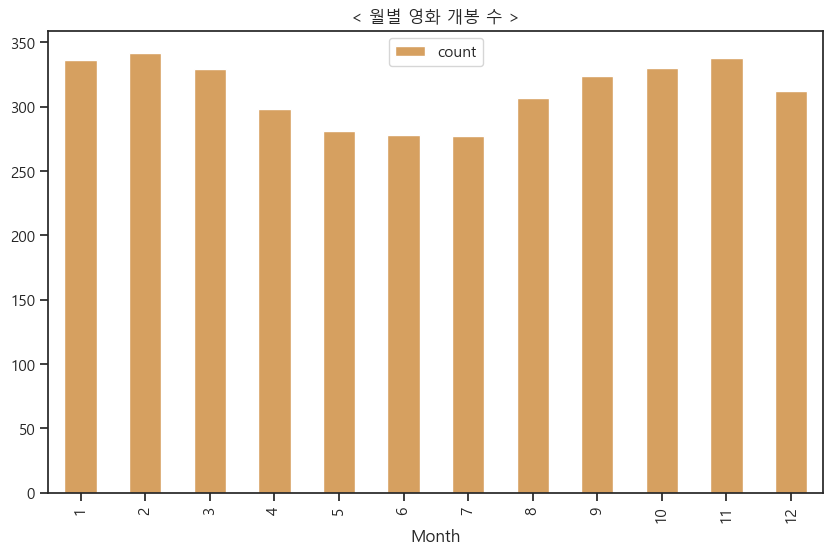

In [ ]:
temp.plot(kind= "bar",  x='Month', color= '#D6A060')
plt.title("< 월별 영화 개봉 수 >")

### 영화 러닝 타임

Text(0, 0.5, '영화 수 (count)')

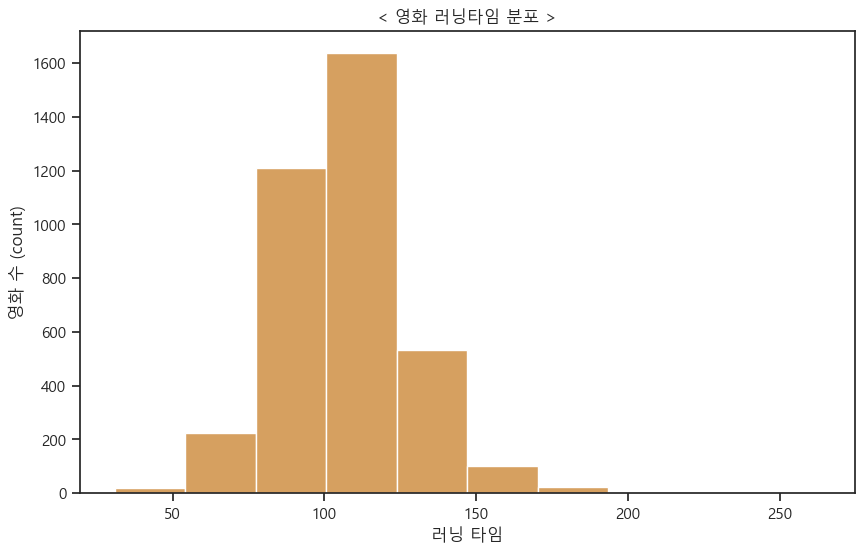

In [ ]:
# 러닝 타임 전체 분포
plt.hist(data_3["Running_time"], color = "#D6A060")
plt.title("< 영화 러닝타임 분포 >")
plt.xlabel(" 러닝 타임 ")
plt.ylabel("영화 수 (count)")

(60.0, 200.0)

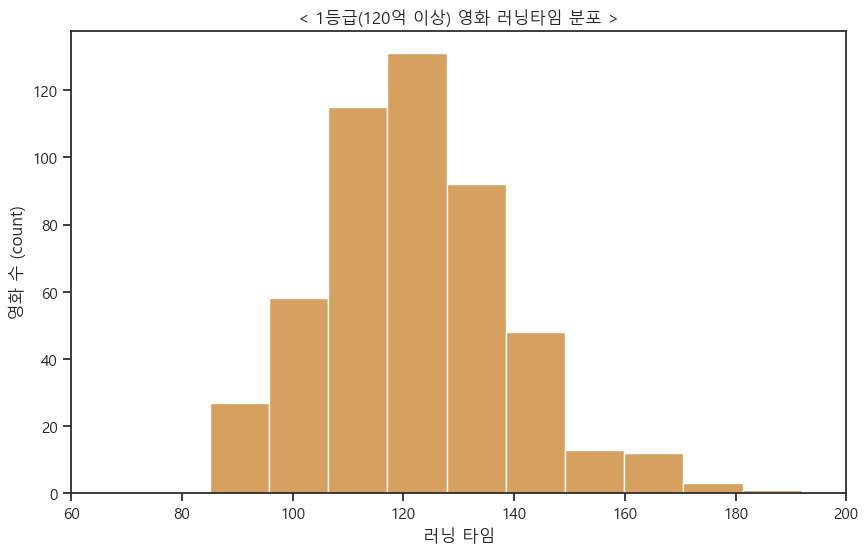

In [ ]:
# 1등급 영화 러닝타임 분포

plt.hist(data_3[data_3["grade_num"]=="1등급(120억 이상)"]["Running_time"], color = "#D6A060")
plt.title("< 1등급(120억 이상) 영화 러닝타임 분포 >")
plt.xlabel(" 러닝 타임 ")
plt.ylabel("영화 수 (count)")
plt.xlim(60,200)

(60.0, 200.0)

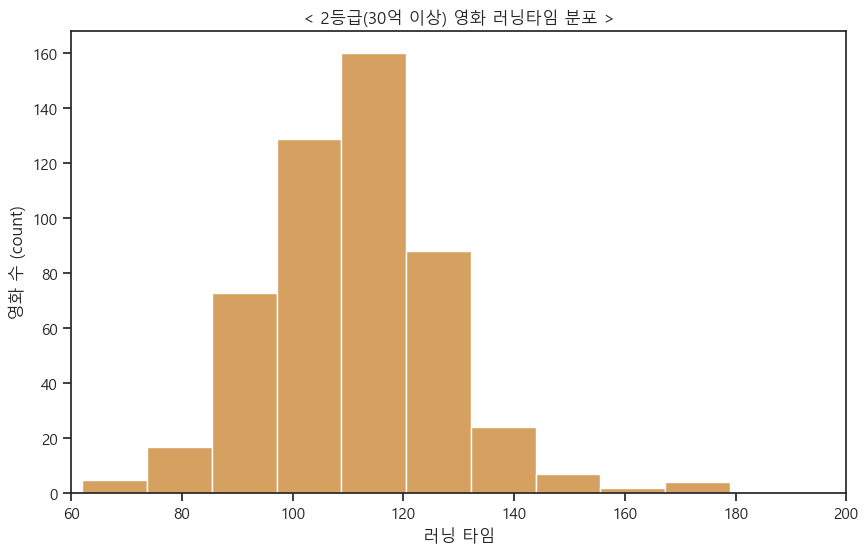

In [ ]:
# 2등급 영화 러닝타임 분포

plt.hist(data_3[data_3["grade_num"]=="2등급(30억 이상)"]["Running_time"], color = "#D6A060")
plt.title("< 2등급(30억 이상) 영화 러닝타임 분포 >")
plt.xlabel(" 러닝 타임 ")
plt.ylabel("영화 수 (count)")
plt.xlim(60,200)

(60.0, 200.0)

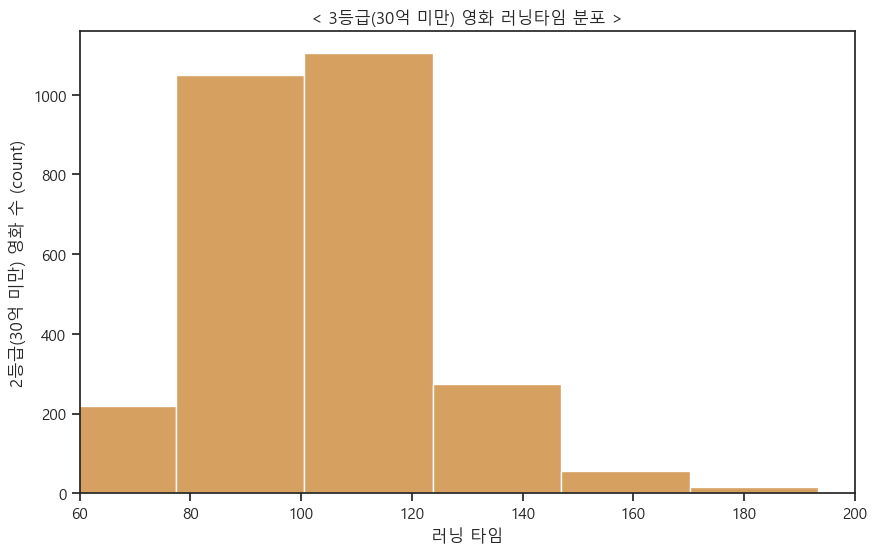

In [ ]:
# 3등급 영화 러닝타임 분포

plt.hist(data_3[data_3["grade_num"]=="3등급(30억 미만)"]["Running_time"], color = "#D6A060")
plt.title("< 3등급(30억 미만) 영화 러닝타임 분포 >")
plt.xlabel(" 러닝 타임 ")
plt.ylabel("2등급(30억 미만) 영화 수 (count)")
plt.xlim(60,200)

In [ ]:
### 러닝 타임 등급별 one way anova 확인

# one way anova : 각 등급의 평균이 똑같은지?, 아니면 하나라도 다른지? 다르면-> 변수로 사용

In [ ]:
from statsmodels.stats.anova import anova_lm

gr1 = data_3.loc[data_3["grade_num"]=="1등급(120억 이상)", 'Running_time']
gr2 = data_3.loc[data_3["grade_num"]=="2등급(30억 이상)", 'Running_time']
gr3 = data_3.loc[data_3["grade_num"]=="3등급(30억 미만)", 'Running_time']

# 각 그룹의 평균 확인

print(np.mean(gr1))
# >> 121.956

print(np.mean(gr2))
# >> 111.11001964636542

print(np.mean(gr3))
# >> 103.02223842508202


121.956
111.11001964636542
103.02223842508202


In [ ]:
# scipy.stats.shapiro() 을 사용하여 정규성 만족 확인

print(stats.shapiro(gr1).pvalue)
# >> 1.6442945707240142e-06

print(stats.shapiro(gr2).pvalue)
# >> 1.6442945707240142e-06

print(stats.shapiro(gr3).pvalue)
# >> 1.6442945707240142e-06

# 전부 0.05 보다 작아서 정규성 불만족 -> anova 평균 비교가 불가

1.6442945707240142e-06
4.0544361468164425e-07
1.4753624241279726e-25


In [ ]:
# 정규성 만족 못했을 경우 kruskal() 로 검정 테스트 진행
# 순위합 검정의 하나, 오름차순으로 순위를 매겨서 군별로 순위 합을 구함.
# 표본은 독립적, 최소 순서형 변수로 대소 비교가 가능하다고 가정
# 중앙값은 같지 않다고 판단 하.

stat, p = kruskal(gr1, gr2, gr3)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# >> KruskalResult(statistic=457.828, pvalue=0.000)

# 순위합 검정을 했을 때 차이가 있다고 판단.

Statistics=457.828, p=0.000


In [ ]:
# 정규성 만족 못하긴 하지만 대충 무시하고 oneway anova 확인했을 때

f_statistic,pvalue = stats.f_oneway(gr1, gr2, gr3)
print('f_statistic: {} ,pvalue = {}'.format(f_statistic,pvalue))

# >> anova(statistic=210.41799093734645, pvalue=2.4630825224136245e-87)
# 어림도 없음.세개의 평균 중 하나라도 다르다고 판단.

f_statistic: 210.41799093734645 ,pvalue = 2.4630825224136245e-87


In [ ]:
# density 밀도 그래프 확인

C:\Users\NT551XCJ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\NT551XCJ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\NT551XCJ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


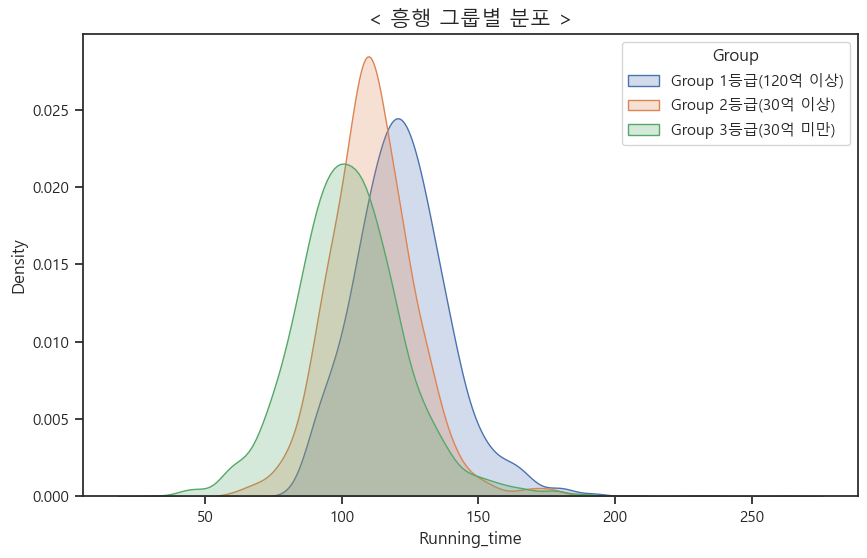

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

groups = data_3['grade_num'].unique()

plt.rcParams['figure.figsize'] = [10, 6]
plt.title("< 흥행 그룹별 분포 >", fontsize= 15)

for group in groups:
    subset = data_3[data_3['grade_num'] == group]
    sns.kdeplot(subset['Running_time'], label=f'Group {group}', fill=True)

plt.legend(title='Group')

# 조금씩 차이가 있을 것 같아보임

Text(0.5, 1.0, '<장르별 데이터 수>')

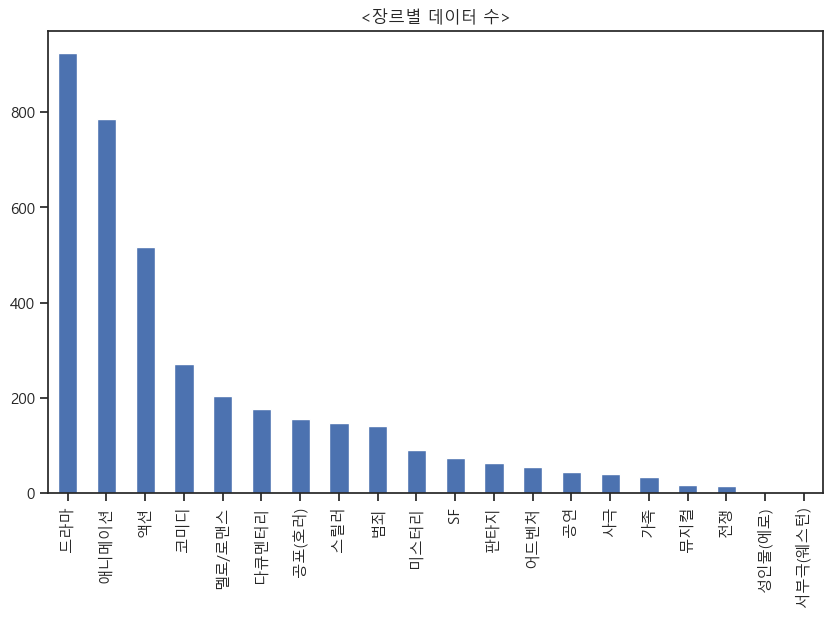

In [ ]:
# 장르별 데이터 수

genre_count.plot(kind='bar')
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.title('<장르별 데이터 수>')

### pair plot

C:\Users\NT551XCJ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\NT551XCJ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\NT551XCJ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.02, '< Pair plot > ')

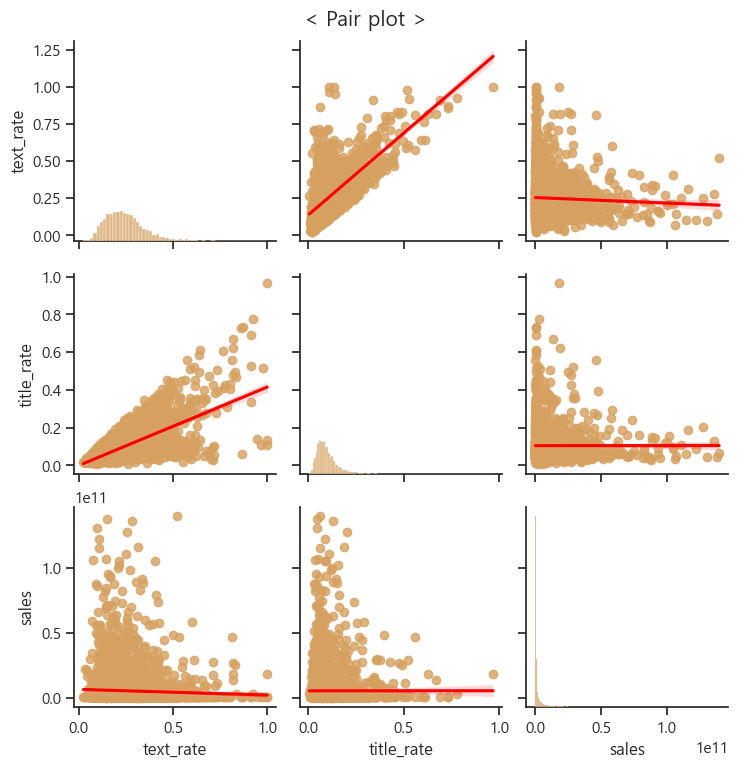

In [ ]:
sns.pairplot(data_3.loc[:, ["text_rate","title_rate","sales"]],
             plot_kws = {'color':'#D6A060', 'line_kws': {'color': 'red'}},
             diag_kws = {'color': '#D6A060'},
            kind='reg')
plt.suptitle("< Pair plot > ", y=1.02, fontsize = 15)

### 그룹별 얼굴특징 count

In [ ]:
# 필요한 컬럼 정리
col = [i  for i in data.columns if "Value_0" in i ]+["grade_num"]
col

['Smile_Value_0',
 'Eyeglasses_Value_0',
 'Sunglasses_Value_0',
 'Gender_Value_0',
 'Beard_Value_0',
 'Mustache_Value_0',
 'EyesOpen_Value_0',
 'MouthOpen_Value_0',
 'FaceOccluded_Value_0',
 'grade_num']

In [ ]:
temp = data_3[col]

temp = temp.replace(999, pd.NA)
temp = temp.groupby("grade_num").sum()/temp.groupby("grade_num").count()
temp.reset_index(inplace=True)

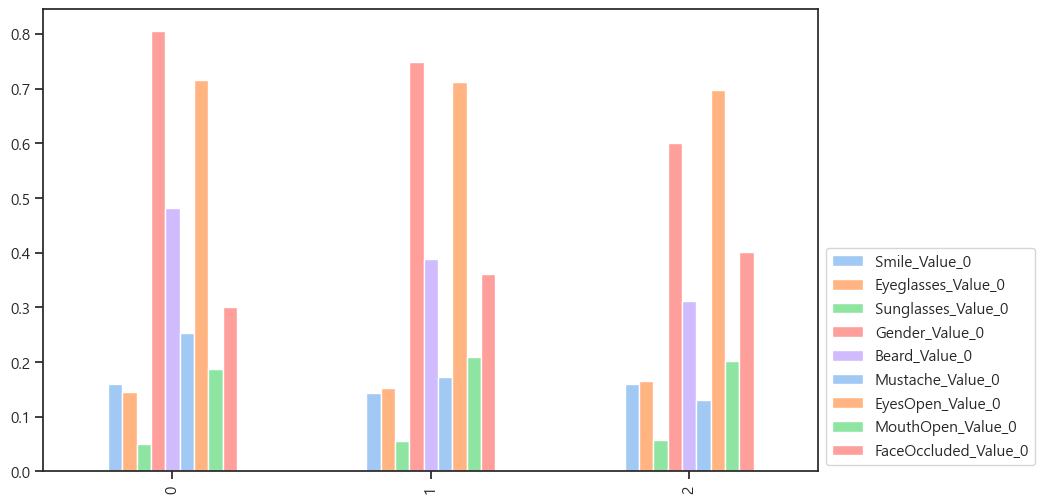

In [ ]:
colors = sns.color_palette('pastel')[0:5]
temp.drop(["grade_num"], axis=1).plot(kind = "bar", color = colors)


plt.legend(loc=0, bbox_to_anchor=(1.0, 0.5))

# mustache, gender 가 좀 달라보임.

In [ ]:
temp = temp.transpose()

In [ ]:
temp.columns = temp.iloc[0]
temp = temp.iloc[1:,:]
temp

grade_num,1등급(120억 이상),2등급(30억 이상),3등급(30억 미만)
Smile_Value_0,0.16044,0.143198,0.160555
Eyeglasses_Value_0,0.145055,0.152745,0.165474
Sunglasses_Value_0,0.050549,0.054893,0.056798
Gender_Value_0,0.804396,0.749403,0.600179
Beard_Value_0,0.481319,0.389021,0.312165
Mustache_Value_0,0.252747,0.171838,0.129696
EyesOpen_Value_0,0.716484,0.711217,0.698122
MouthOpen_Value_0,0.186813,0.210024,0.201699
FaceOccluded_Value_0,0.301099,0.360382,0.400268


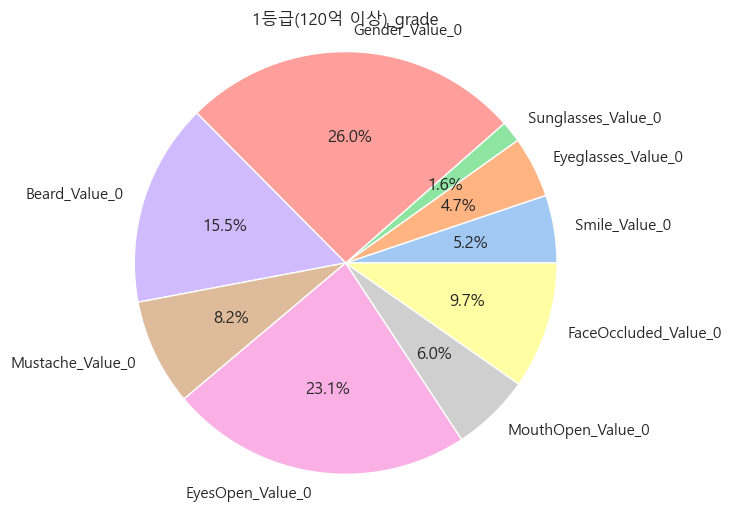

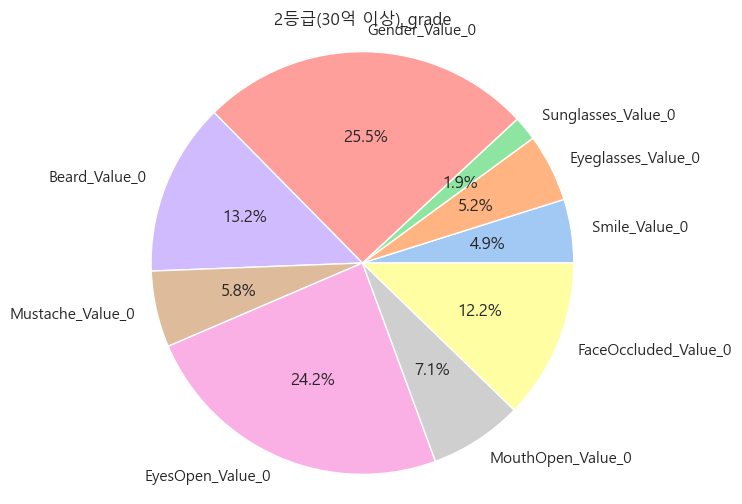

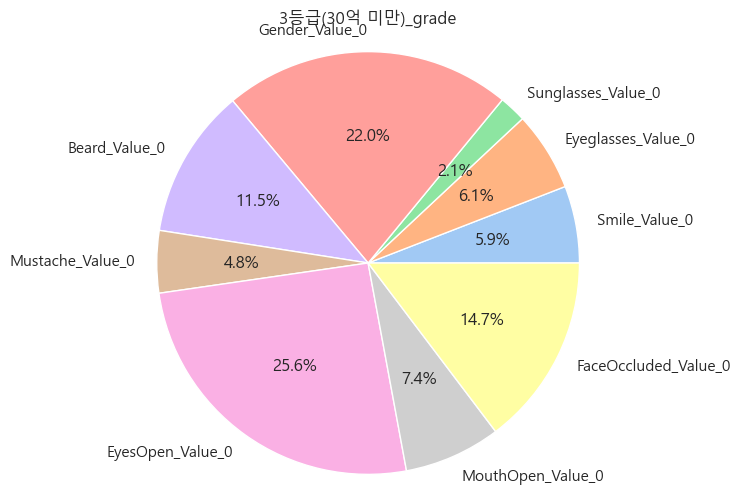

In [ ]:
colors = sns.color_palette('pastel')[0:9]

for column in temp.columns:
    plt.figure(figsize=(6, 6))
    plt.pie(temp[column], labels=temp.index, autopct='%1.1f%%',colors = colors)
    plt.title(f"{column}_grade")
    plt.axis('equal')
    plt.show()

# 원그래프로 그리려고 했는데 이렇게 보면 안될 듯;;